In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset 
df = pd.read_csv("marketing_campaign.csv" , delimiter = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Checking for all column names
print(df.columns)
# Checking varaible types
print(df.dtypes)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchas

In [4]:
# Checking for columns containing null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Income'], dtype='object')

In [5]:
# Filling Income null values with the average value of Income
average_income = df["Income"].mean()
df["Income"] = df["Income"].fillna(average_income)

In [6]:
# Transforming customer joining date to datetime format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"] , format = "%d-%m-%Y")

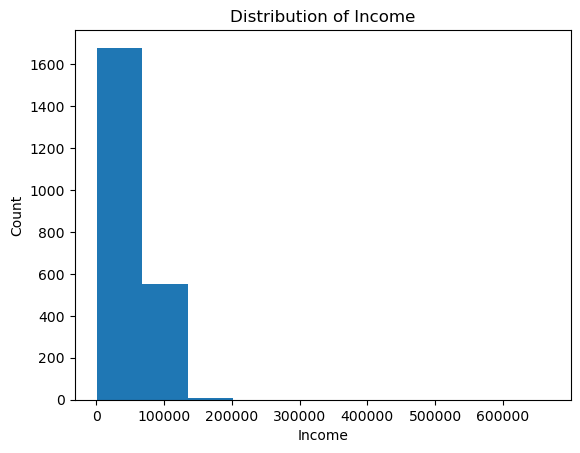

In [7]:
# Distribution plot for Income
plt.hist(df["Income"] , bins = 10)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income")
plt.show()

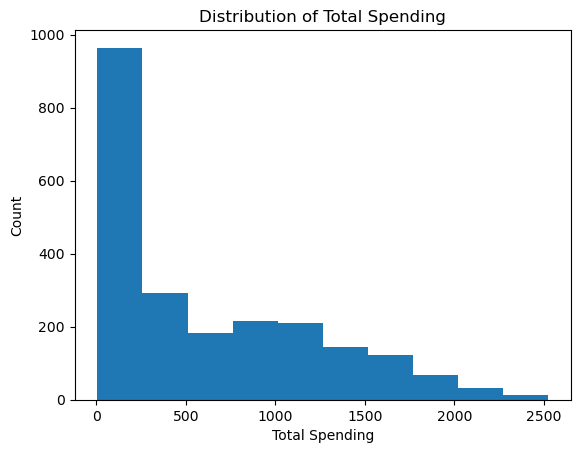

In [8]:
# Creating a new Total_Spending column
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
# Distribution plot for Total_Spending
plt.hist(df["Total_Spending"] , bins = 10)
plt.xlabel("Total Spending")
plt.ylabel("Count")
plt.title("Distribution of Total Spending")
plt.show()

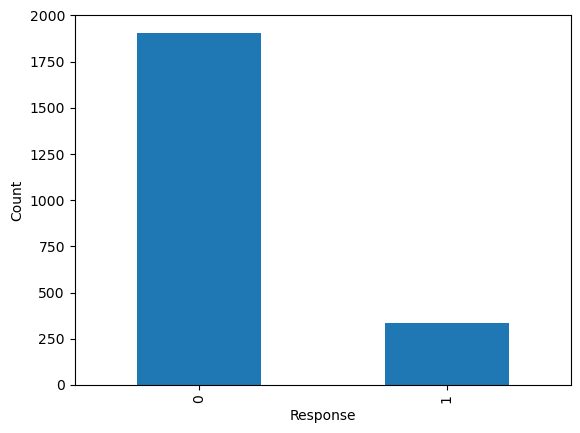

In [9]:
# Bar chart for last campaign response
df["Response"].value_counts().plot(kind = "bar")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

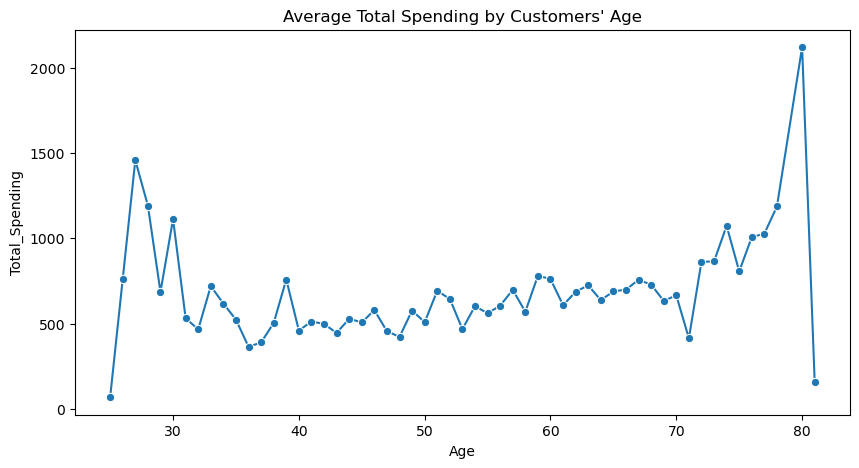

In [10]:
# Create new varaible age 
df["Age"] = 2021 - df["Year_Birth"]
# Drop age between 121 and 128 (ages not important for the analysis)
df = df[~df["Age"].between(121, 128)].copy()
age_spend = df.groupby("Age")["Total_Spending"].mean().reset_index()
plt.figure(figsize = (10,5))
sns.lineplot(data = age_spend , x = "Age" , y = "Total_Spending" , marker = "o")
plt.title("Average Total Spending by Customers' Age")
plt.show()

From the lineplot, there are 2 peaks where the average total spending increases; These 2 peaks are associated with customers who are aged 28 and customers aged 80. There are also other high amounts of spending especially for the age ranged from 25 to 31 and from 73 to 80. At first sight, it would be a good starting point to target these age groups because of their high total spending

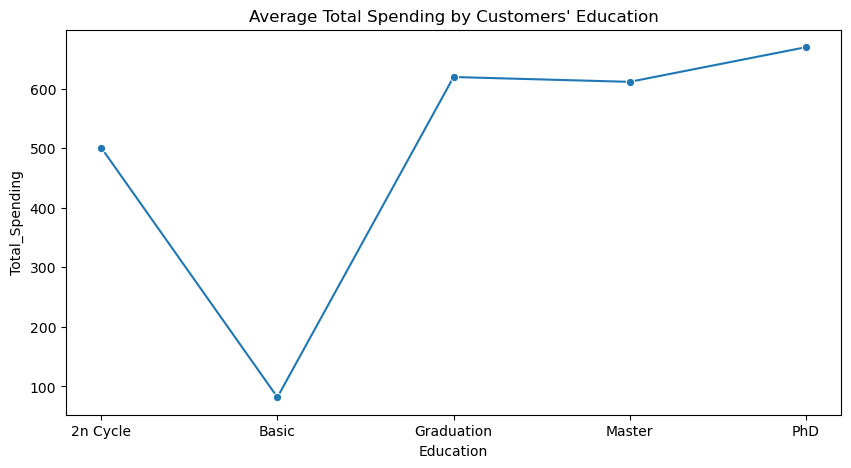

In [11]:
education_spend = df.groupby("Education")["Total_Spending"].mean().reset_index()
plt.figure(figsize = (10,5))
sns.lineplot(data = education_spend , x = "Education" , y = "Total_Spending" , marker = "o")
plt.title("Average Total Spending by Customers' Education")
plt.show()

Based of the average total spending by customers' education plot, it is clear that customers with the basic education have the lowest average total spending compared to other customers and PhD holders tend to be the highest spenders. So, it is safe to say that the higher education a customer has, the higher they spend on average

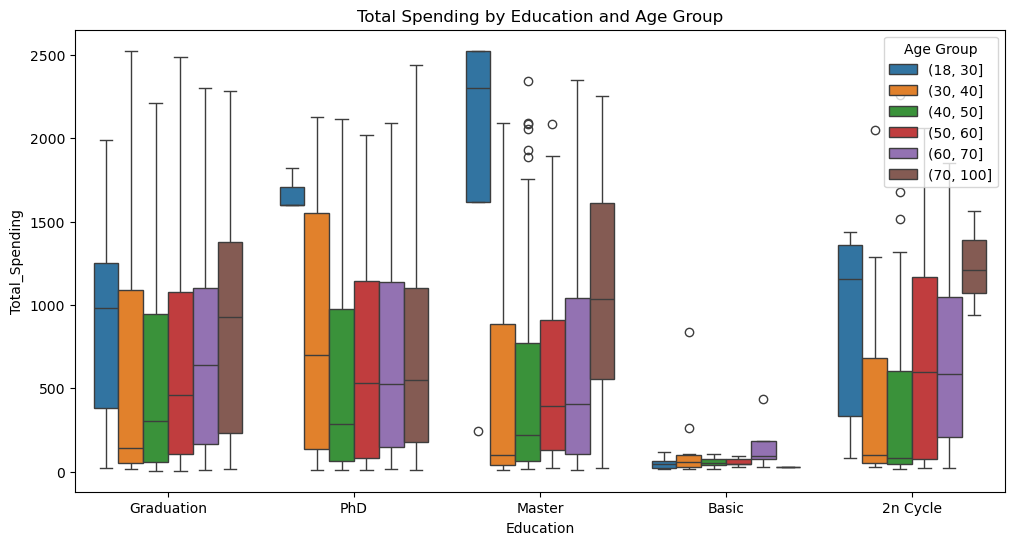

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Education", y="Total_Spending", hue=pd.cut(df["Age"], bins=[18,30,40,50,60,70,100]))
plt.title("Total Spending by Education and Age Group")
plt.legend(title="Age Group")
plt.show()

This boxplot combines the previous 2 analysis, where it shows that the highest spending group of customers is holders of Master degrees and aged between 18 and 30.

<Axes: title={'center': 'Campaign Acceptance Rates (%)'}>

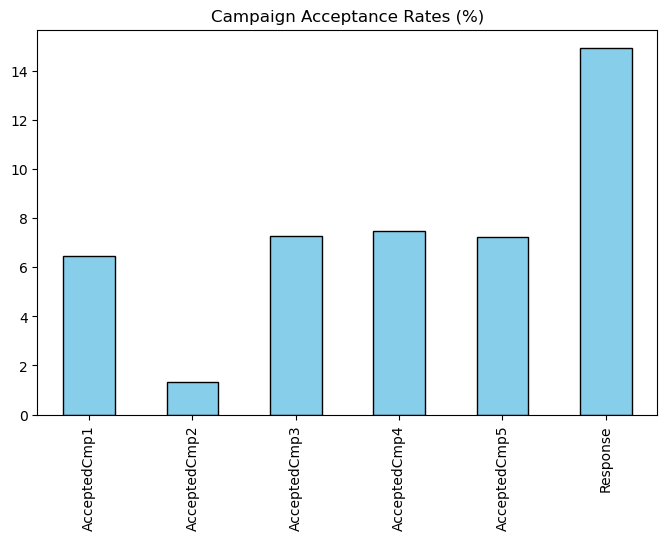

In [13]:
# Different campaign acceptance rates and comparaison
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
acceptance_rates = df[campaign_cols].mean() * 100
acceptance_rates.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(8,5), title="Campaign Acceptance Rates (%)")

It looks like response to previous campaign is better than than current campaigns. Also, the acceptance rate of the 2nd campaign is the lowest compared to all other campaigns

In [14]:
# Cross tab analysis (checking if there is a relationship between Reponse and acceptance of current campaigns)
for col in campaign_cols[:-1]:  
    print("\n", pd.crosstab(df[col], df['Response']))


 Response         0    1
AcceptedCmp1           
0             1838  255
1               65   79

 Response         0    1
AcceptedCmp2           
0             1893  314
1               10   20

 Response         0    1
AcceptedCmp3           
0             1817  257
1               86   77

 Response         0    1
AcceptedCmp4           
0             1798  272
1              105   62

 Response         0    1
AcceptedCmp5           
0             1833  242
1               70   92


It looks like there isn't a clear trend or any relationship between these variables from the cross tab analysis. Therefore, we will proceed to use the heatmap (correlation between all campaigns) to get more insights

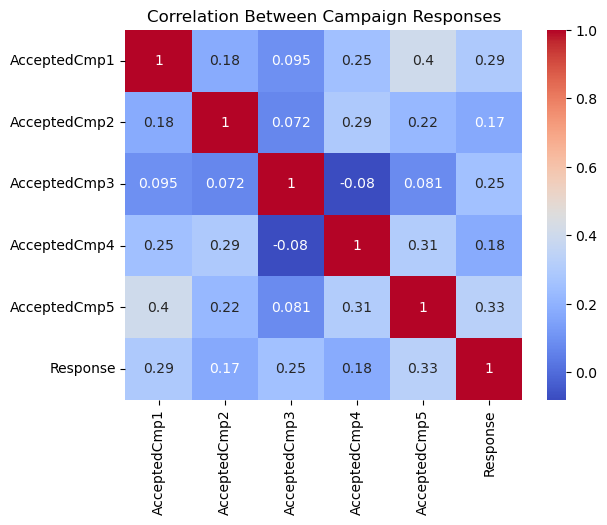

In [15]:
sns.heatmap(df[campaign_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Campaign Responses")
plt.show()

Even with heatmap, we still can't detect any clear correlation between the campaigns (response and current campaigns). Therefore, we will not be using the AcceptedCmp1 to 5 variables and only focusing on the resposne varaible

In [16]:
# Preparing the numeric fields and encoding the categorical varaible "marital_status" for customer segmentation with k-means clustering
# Only added the marital status while ignoring other important variables such as education because if added, the clusters would overlap
numeric_features = ["Income", "Total_Spending", "Age", "Response",]
marital_categories = ["Single", "Together", "Married", "Divorced", "Widow", "Alone", "Absurd", "YOLO"]
df["Marital_Status"] = pd.Categorical(df["Marital_Status"], categories = marital_categories)
marital_dummies = pd.get_dummies(df["Marital_Status"], prefix="Marital")
df = pd.concat([df, marital_dummies], axis=1)
X = pd.concat([df[numeric_features], marital_dummies], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

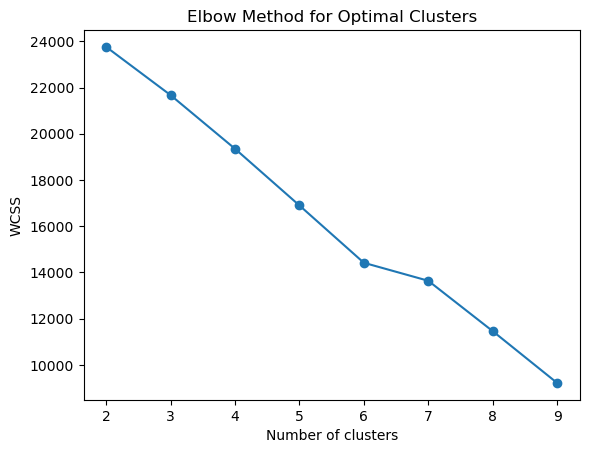

In [17]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Based on the elbow method the ideal number of clusters would be 6 (6 different groups of customers). However, we will be performing a silhouette score test to see which number of clusters will result in the highest silhouette score

In [18]:
scores = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    print(f"Number of clusters: {k}, Silhouette Score: {score:.4f}")

Number of clusters: 2, Silhouette Score: 0.2129
Number of clusters: 3, Silhouette Score: 0.2848
Number of clusters: 4, Silhouette Score: 0.3673
Number of clusters: 5, Silhouette Score: 0.4091
Number of clusters: 6, Silhouette Score: 0.4100
Number of clusters: 7, Silhouette Score: 0.4196
Number of clusters: 8, Silhouette Score: 0.4218
Number of clusters: 9, Silhouette Score: 0.3756


Based on the silhouette score test, the optimal number of clusters is 8

In [19]:
# View of each cluster charactersitics (for profiling and the business inisghts)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled) + 1
cluster_profile_numeric = df.groupby("Cluster")[numeric_features].mean().round(2)
cluster_profile_marital_counts = df.groupby("Cluster")[marital_dummies.columns].sum()
cluster_sizes = df.groupby("Cluster").size()
cluster_profile_marital_pct = cluster_profile_marital_counts.div(cluster_sizes, axis=0).multiply(100).round(2)
cluster_profile = pd.concat([cluster_profile_numeric, cluster_profile_marital_pct], axis=1)
cluster_profile["Cluster_Size"] = cluster_sizes
print(cluster_profile)

           Income  Total_Spending    Age  Response  Marital_Single  \
Cluster                                                              
1        50999.69          607.70  49.35      0.22           100.0   
2        53181.16          606.24  53.13      0.10             0.0   
3        51729.21          590.80  51.42      0.11             0.0   
4        72365.50         1192.50  46.00      0.50             0.0   
5        52904.33          612.99  54.44      0.21             0.0   
6        43789.00          256.67  48.00      0.33             0.0   
7        48432.00          424.00  48.00      0.50             0.0   
8        56426.56          738.82  62.44      0.25             0.0   

         Marital_Together  Marital_Married  Marital_Divorced  Marital_Widow  \
Cluster                                                                       
1                     0.0              0.0               0.0            0.0   
2                   100.0              0.0               0.0  

In [24]:
cluster_labels = {
    1: "Young Singles",
    2: "Young Couples",
    3: "Married, Middle-Age",
    4: "High-Income Divorced",
    5: "Older Widowed Adults",
    6: "Low-Income Alone",
    7: "YOLO Lifestyle",
    8: "Marital Absurd"
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

## Cluster 1: Young Singles 
This segment is composed entirely of single individuals around 49 years old, with an average annual income of 50,900 and spending of 607. Their campaign response rate is 0.22, indicating moderate openness to offers.
### Actions
Focus on lifestyle-oriented campaigns such as leisure, travel, or self-improvement products. Promote aspirational products that reinforce independence. Offer seasonal discounts or social experiences they can join solo.

## Cluster 2: Young Couples 
All members of this group are couples living together (but not married) with an average age of 53, income of 53,181 and spending of 606. Their response rate is 0.10, the lowest among all clusters.
### Actions
Avoid heavy investment in mass campaigns here unless highly targeted. Use relationship-oriented offers like weekend getaways or couple activities, but expect low overall ROI unless personalization is high.

## Cluster 3: Married, Middle-Age
This group consists solely of married individuals around 51 years old, earning 51,729 and spending 590. Their response rate is 0.11, suggesting low campaign receptiveness.
### Actions
Focus on family-oriented promotions, loyalty programs, and bundled offers (family packages). They may respond better to trust-building campaigns than flashy one-off deals.

## Cluster 4: High-Income Divorced (Tiny Segment)
A very small but highly valuable group divorced individuals around 46 years old with the highest income 72,366 and highest spending 1,193. Their response rate is 0.50, making them extremely responsive.
### Actions
Prioritize this cluster despite its size. Use personalized, premium offers luxury products, exclusive memberships, or high-end travel experiences. These customers should be directly nurtured with VIP treatment.

## Cluster 5: Older Widowed Adults 
Entirely widowed individuals averaging 54 years old, with income of 52,904 and spending of 612. Response rate is 0.21, indicating moderate openness.
### Actions
Offer community-oriented products, comfort services, and experiences that foster social engagement. Senior discounts or value packages could resonate well.

## Cluster 6: Low-Income Alone
A very small cluster of individuals living alone with the lowest income 43,789 and spending 256. Their response rate is 0.33, relatively high given their low spending power.
### Actions
Focus on affordable, high-value items. This group is sensitive to pricing but responsive to offers. Loyalty discounts, installment payment options, and bundled bargains would work well.

## Cluster 7: YOLO Lifestyle
This cluster embraces a “YOLO” mindset, with members around 50 years old, income of 48,432, and spending of 424. Their response rate is 0.50, tied for the highest.
### Actions 
Use urgency-driven marketing like flash sales, limited-time events, adventure packages. They are impulse buyers, so experiential and emotionally charged campaigns will likely work best.

## Cluster 8: Marital Absurd
An unusual segment with an average age of 62, income of 56,426, and spending of 738. Response rate is 0.25, indicating moderate engagement.
### Actions
Lean into unconventional or humorous marketing that matches their unique profile. Niche, quirky product lines or exclusive experiences could connect well with this group.

### Business Insights from Customer Segmentation
The clustering analysis reveals clear and distinct customer groups, each with unique demographic, spending, and engagement behaviors. Three main opportunity areas emerge: maximizing revenue from high-spending clusters, nurturing moderately engaged but price-sensitive groups, and avoiding resource waste on low-engagement, low-spending segments.
1. High-Value, High-Response Segments Drive ROI
Clusters such as Cluster 4 (High-Income Divorced) and Cluster 7 (YOLO Lifestyle) combine strong spending power or spending tendencies with very high campaign responsiveness (0.50). Targeted, premium, and exclusive campaigns toward these groups are likely to produce the highest return on marketing investment. While Cluster 4 is tiny, its potential profit per customer is enormous and worth personal attention.
2. Engaged but Budget-Conscious Groups Present Growth Potential
Cluster 6 (Low-Income Alone) shows above-average responsiveness (0.33) despite having the lowest income and spending levels. This suggests they are open to offers but highly price-sensitive. Providing value-driven options such as promotions, loyalty rewards, and affordable bundles can increase sales without eroding margins significantly.
3. Stable, Low-Response Groups Require Selective Targeting
Clusters such as Cluster 2 (Young Couples Together) and Cluster 3 (Married Middle-Age) show low responsiveness (0.10–0.11) and moderate spending. These customers are likely settled into existing purchasing patterns. Mass marketing may not be effective here; instead, brand reinforcement, customer retention strategies, and high-relevance personalization are needed to prevent churn without overspending on acquisition campaigns.
4. Niche and Lifestyle Positioning Can Unlock New Engagement
Clusters such as Cluster 8 (Marital Absurd) and Cluster 1 (Young Singles) demonstrate moderate responsiveness and distinct lifestyle markers. Creative, niche-oriented campaigns or unconventional brand messaging could spark deeper engagement and differentiate the brand in these groups.
5. Demographics Align with Spending Behavior
The marital status variable aligns strongly with spending and responsiveness. Widowed, divorced, or YOLO-oriented individuals tend to have either the highest or most opportunistic engagement rates, suggesting life stage and personal lifestyle choices are significant drivers of purchase intent.
### Strategic Takeaway:
Prioritize marketing spend on Clusters 4, 7, and 6 for short-term sales boosts and high ROI. For sustained growth, experiment with creative targeting for Clusters 1 and 8, while maintaining cost-effective retention strategies for Clusters 2, 3, and 5.

In [25]:
# Saving the final dataset
df.to_csv("Marketing_Campaign_Final.csv", index = False)